![HERE](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUolCmySFuP3kJnmkPvN58SBKttzm434yP6Q&usqp=CAU)
<h1><center>Introduction</center></h1>
Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Dipinder Goyal, Pankaj Chadah and Junian Patidar in 2008

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import iplot

### read dataset

In [ ]:
df=pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
len(df['name'].unique())

In [ ]:
df.isna().sum()

### geting the all NAN features

In [ ]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

### of missing values

In [ ]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

* This is percentage for columns have massing value we found ( rate have 15.0337%) and phone have2.3358% missing values and location have 0.0406% now we know the big missing value in columns (rate)

In [ ]:
df['rate'].unique()

* now we can clean the rate columns from the missing value.

In [ ]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [ ]:
df.shape

* def function to remove (/) from rate 

In [ ]:
def split(x):
    return x.split('/')[0]

In [ ]:
df['rate']=df['rate'].apply(split)

In [ ]:
df.head()

In [ ]:
df['rate'].unique()

* the rate is clrean


* now we go to remove (NEW)

In [ ]:
df.replace('NEW',0,inplace=True)

In [ ]:
df.replace('-',0,inplace=True)

In [ ]:
df.replace('-',0,inplace=True)

In [ ]:
df['rate']=df['rate'].astype(float)

* Now let's see this

In [ ]:
df['rate'].unique()

* very good it's very clean know.
 

### calculate avg rating of each resturant

In [ ]:
df.groupby('name')['rate'].mean()

* we can plot this number to understand more

In [ ]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

* here we change the name of columns from(name , rate) to (restorant and rating)

In [ ]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(10)

In [ ]:
df_rate.shape

### Calc the rating distribution

In [ ]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

*  Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

#### Which are the top restaurant chains in Bangaluru?

In [ ]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

* now we can how many rest do not accept online order

In [ ]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

* we can  using plotly to How many of the restuarants do not accept online orders?

In [ ]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [ ]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

* Wow the big prsentage accept look on chart will see 64.4% accept is good

* here will know,  What is the ratio b/w restaurants that provide and do not provide table booking ?

In [ ]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

In [ ]:
x=df['book_table'].value_counts()
labels=['not book','book']

In [ ]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [ ]:
iplot([trace])

#### How many types of restaurants we have?

In [ ]:
df['rest_type'].isna().sum()

In [ ]:
df['rest_type'].dropna(inplace=True)

In [ ]:
df['rest_type'].isna()

In [ ]:
len(df['rest_type'].unique())

In [ ]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

* Know we using I love using ploty. ploty showing more information about data

In [ ]:
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')
iplot([trace1])

### Now we can know what is highest voted restaurant

In [ ]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()

In [ ]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')
iplot([trace1])

* we see the most vote for (By Brewski Company)

### total restaurants at different locations of Bengalore

In [ ]:
df.groupby('location')['name'].unique()

In [ ]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))


In [ ]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

In [ ]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()


In [ ]:
df_total.sort_values(by='restaurant').tail(10).index

In [ ]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [ ]:
iplot([trace1])

### geographical analysis
*  I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [ ]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [ ]:
locations['new_Name']='Bangalore '+locations['Name']

In [ ]:
locations.head()

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [ ]:
locations['geo_loc']=lat_lon

In [ ]:
locations.head()

##### We have found out latitude and longitude of each location listed in the dataset using geopy.
##### This is used to plot maps.

In [ ]:
locations.to_csv('zomato_locations.csv',index=False)

In [ ]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [ ]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

In [ ]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [ ]:
len(Restaurant_locations['geo_loc'])

In [ ]:
Restaurant_locations.isna().sum()

In [ ]:
np.array(Restaurant_locations['geo_loc'])

In [ ]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [ ]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [ ]:
Restaurant_locations[['lat','lon','count']].values.tolist()

In [ ]:
import folium
from folium.plugins import HeatMap
#basemap=generateBaseMap()

In [ ]:
df2= df[df['cuisines']=='North Indian']
df2.head()



In [ ]:
df3= df[df['cuisines']=='South Indian']
south_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['Name','count']
south_india=south_india.merge(locations,on="Name",how='left').dropna()
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)

In [ ]:
south_india=south_india.drop(['geo_loc'],axis=1)

In [ ]:
south_india.head()

### Total number of variety of restaurants ie north indian,south Indian

In [ ]:

cuisines=df['cuisines'].value_counts()[:20]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [ ]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar( 
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')
iplot([trace1])

* We can observe that North Indian,chinese,South Indian and Biriyani are most common.
* It means Bengalore is more influenced by North Indian culture more than South

### Now we Anlyse Approx cost for 2 people

In [ ]:
df['approx_cost(for two people)'].value_counts()

In [ ]:
len(df['approx_cost(for two people)'].value_counts())

In [ ]:
df['approx_cost(for two people)'].isna().sum()

In [ ]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [ ]:
df['approx_cost(for two people)'].isna().sum()

* Now columns is clean

In [ ]:
df['approx_cost(for two people)'].unique()

In [ ]:
def is_float(x):
    try:
        float(x)
    except :
        return False 
    return True

In [ ]:
df[~df['approx_cost(for two people)'].apply(is_float)]

In [ ]:
df['approx_cost(for two people)'].dtype

In [ ]:
type(df['approx_cost(for two people)'][0])

* we convert str to int


In [ ]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [ ]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [ ]:
df['approx_cost(for two people)']

* we can now plot this columns ( **cost vs rating**)

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

##### from this scattterplot,we can come up with a conclusion ya most of the highest rated accepts online order and they r budgeted too

### Is there any difference b/w votes of restaurants accepting and not accepting online orders?

In [ ]:
sns.boxplot(x='online_order',y='votes',data=df)

#### from this boxplot,we can observe that median number of votes for both categories vary.
#### Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.


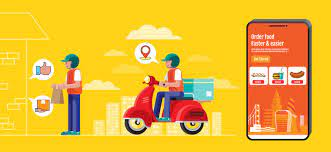
<h1><center> Online Order</center></h1>

#### Is there any difference b/w price of restaurants accepting and not accepting online orders?

In [ ]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

In [ ]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

#### Statisticn method equal: 
* we see in (**Yes**) (min=40, median=450) and in (**No**) (min=50,median=500)
* Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders

##### distribution of cost for 2 people

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

In [ ]:
px.histogram(df, x="approx_cost(for two people)")